In [ ]:
from IPython.display import display, Markdown
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
import math
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import pandas as pd 
import scipy.stats as ss
import seaborn as sns
import os
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# Decide between local or kaggle cloud storage         
KAGGLE_ENV = 'kaggle' in os.listdir('/')
data_path = '/kaggle/input' if KAGGLE_ENV else '../kaggle/input'

# This is a good idea to work only locally. But If you wanna ran your NB also at kaggle... this is not working.
# # Pull the dataset from kaggle, it is concat dataset train + original dataset
# dataset_name = 'dantheshark/s4-e11-train-concat'
# if KAGGLE_ENV:
#     kaggle.api.dataset_download_files(dataset_name, path="../kaggle/input/", unzip=True)


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
    
for dirname, _, filenames in os.walk(data_path):
    for filename in filenames:
        print(os.path.join(dirname, filename)) 

../kaggle/input/submission.csv
../kaggle/input/s4-e11-train-concat-final.csv
../kaggle/input/depression-surveydataset-for-analysis/final_depression_dataset_1.csv
../kaggle/input/playground-series-s4e11/sample_submission.csv
../kaggle/input/playground-series-s4e11/test.csv
../kaggle/input/playground-series-s4e11/train.csv
../kaggle/input/s4-e11-test-concat/s4-e11-test-concat.csv
../kaggle/input/s4-e11-train-concat-final/s4-e11-train-concat-final.csv
../kaggle/input/s4-e11-train-concat-final/dataset-metadata.json
../kaggle/input/s4-e11-train-concat/s4-e11-train-concat.csv
../kaggle/input/s4-e11-test-concat-final/s4-e11-test-concat-final.csv


# Load Data

In [90]:
# Load the data
train_original = pd.read_csv(data_path + '/playground-series-s4e11/train.csv')
test_original = pd.read_csv(data_path + '/playground-series-s4e11/test.csv')
sample_submission = pd.read_csv(data_path + '/playground-series-s4e11/sample_submission.csv')

original_data = pd.read_csv(data_path + '/depression-surveydataset-for-analysis/final_depression_dataset_1.csv')

train_concat_data = pd.read_csv(data_path + '/s4-e11-train-concat/s4-e11-train-concat.csv')
train_final_data = pd.read_csv(data_path + '/s4-e11-train-concat-final/s4-e11-train-concat-final.csv')

test_concat_data = pd.read_csv(data_path + '/s4-e11-test-concat/s4-e11-test-concat.csv')
test_final_data = pd.read_csv(data_path + '/s4-e11-test-concat-final/s4-e11-test-concat-final.csv')
submission_template = pd.read_csv(data_path + '/submission.csv')

# Check the data

In [91]:
train_final_data.head(100)

,Work Pressure,Study Satisfaction,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Depression,Working Professional or Student_Student,Working Professional or Student_Working Professional,Degree_B.Arch,...,Degree_BCA,Degree_BSc,Degree_Class 12,Degree_LLM,Degree_M.Ed,Degree_M.Pharm,Degree_M.Tech,Degree_MCA,Degree_MSc,Degree_Other
0,5,3,2,0,1,2,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4,3,3,1,7,3,1,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,2,5,1,3,1,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,3,1,1,10,1,1,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,3,1,1,9,4,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,3,5,1,10,4,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,4,3,3,1,4,2,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,1,3,3,0,1,2,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
98,2,3,2,0,9,2,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
test_final_data.head(100)

,Work Pressure,Study Satisfaction,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Working Professional or Student_Student,Working Professional or Student_Working Professional,Degree_B.Arch,Degree_B.Com,...,Degree_BCA,Degree_BSc,Degree_Class 12,Degree_LLM,Degree_M.Ed,Degree_M.Pharm,Degree_M.Tech,Degree_MCA,Degree_MSc,Degree_Other
0,2,3,5,0,9,3,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,3,4,0,6,4,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,4,3,1,1,12,4,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,4,1,10,4,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,3,5,1,3,4,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5,3,5,0,10,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,4,3,2,0,8,4,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,1,1,5,1,8,5,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
98,5,4,2,1,0,5,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Modell

## Preprocess the data

In [93]:
# Load preprocessed data
df = train_final_data.copy()

# Define features and target variable
target_column = "Depression"  # Update with your actual target column
X = df.drop(columns=[target_column])
y = df[target_column]

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:


# Define classifiers
models = {
    "XGBoost": xgb.XGBClassifier(
        objective="binary:logistic",
        n_estimators=100,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        tree_method = "hist", device = "cuda"  
    ),
    # "XGBoost": xgb.XGBClassifier(
    #     enable_categorical=True, 
    #     eval_metric='logloss',
    #     random_state=42,
    #     tree_method = "hist", device = "cuda"  
    # ),  
    "LightGBM": lgb.LGBMClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        device="cpu"
        #tree_method = "hist", device = "cuda"
    ),
    "RandomForest": RandomForestClassifier(
        n_estimators=100,
        max_depth=6,
        random_state=42
    )
}

# Train and evaluate each model
best_model = None
best_accuracy = 0
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    
    # Save best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_model_name = name

# Save the best model
MODEL_PATH = f"best_model_{best_model_name}.pkl"
joblib.dump(best_model, MODEL_PATH)
print(f"Best model ({best_model_name}) saved to {MODEL_PATH}")


####

param_grid = {
    #, 5, 7, 10],  # Controls the depth of the trees
        'learning_rate': [0.1],#0.01, 0.05, 0.1, 0.2],  # Step size for updates
        'n_estimators': [300],#100, 200, 300],  # Number of trees
        'subsample': [0.8],#, 1.0],  # Fraction of data per tree
        'colsample_bytree': [0.8],#, 1.0],  # Fraction of features per tree
        'gamma': [0],#, 0.1, 0.2],  # Minimum loss reduction to make a split
        'tree_method': ['hist']  # GPU-friendly method
}
grid_search = GridSearchCV(
    estimator=XGBClassifier(enable_categorical=True, random_state=42, eval_metric='logloss'),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1  # all CPU cores
)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy (CV):", grid_search.best_score_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_temp)
accuracy = accuracy_score(y_temp, y_pred)
print(f"Accuracy on the validation set with optimized parameters: {accuracy:.5f}")

y_pred_test = best_model.predict(test_final_data)


Training XGBoost...
XGBoost Accuracy: 0.91
Training LightGBM...
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 18174, number of negative: 82105
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001899 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 75
[LightGBM] [Info] Number of data points in the train set: 100279, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181234 -> initscore=-1.508007
[LightGBM] [Info] Start training from score -1.508007
[LightGBM] [Warning] Accuracy may be ba

# Test with Test Dataset

In [95]:
predicitions = best_model.predict(test_final_data)
submission_template['Depression'] = predicitions
submission_template.to_csv('submission_boy.csv', index=False)
submission_template.head(100)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


,id,Depression
0,140700,0
1,140701,0
2,140702,1
3,140703,1
4,140704,0
...,...,...
95,140795,0
96,140796,0
97,140797,1
98,140798,1


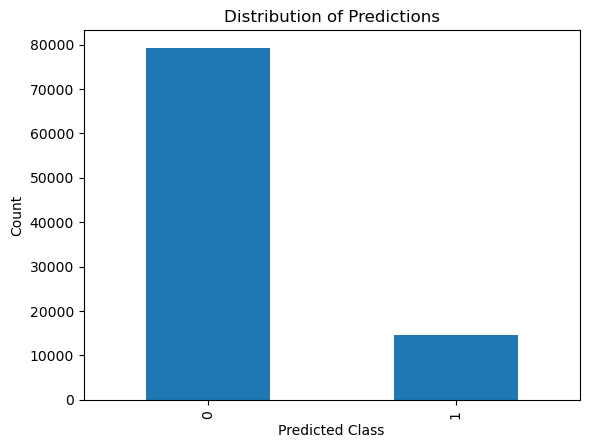

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

# Predictions in DataFrame speichern
df_predictions = pd.DataFrame({"Prediction": predictions})

# Verteilung der Vorhersagen anzeigen
df_predictions["Prediction"].value_counts().plot(kind="bar")
plt.title("Distribution of Predictions")
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.show()


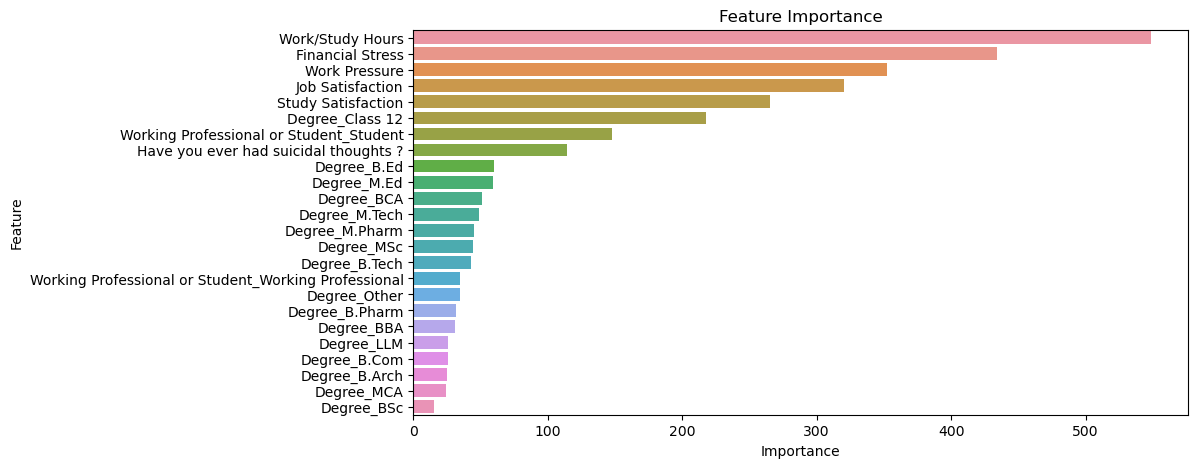

In [97]:
importances = best_model.feature_importances_
feature_names = test_final_data.columns

# DataFrame mit Feature-Wichtigkeit
df_importances = pd.DataFrame({"Feature": feature_names, "Importance": importances})
df_importances = df_importances.sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=df_importances["Importance"], y=df_importances["Feature"])
plt.title("Feature Importance")
plt.show()


In [98]:
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# import seaborn as sns

# # Echte Labels (falls vorhanden)
# y_true = test_labels  # Falls y_test existiert

# # Accuracy Score berechnen
# accuracy = accuracy_score(y_true, predictions)
# print(f"Accuracy Score: {accuracy:.2f}")

# # Confusion Matrix
# cm = confusion_matrix(y_true, predictions)

# # Visualisierung der Confusion Matrix
# plt.figure(figsize=(6,4))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
# plt.xlabel("Predicted Label")
# plt.ylabel("True Label")
# plt.title("Confusion Matrix")
# plt.show()

# # Classification Report
# print(classification_report(y_true, predictions))


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


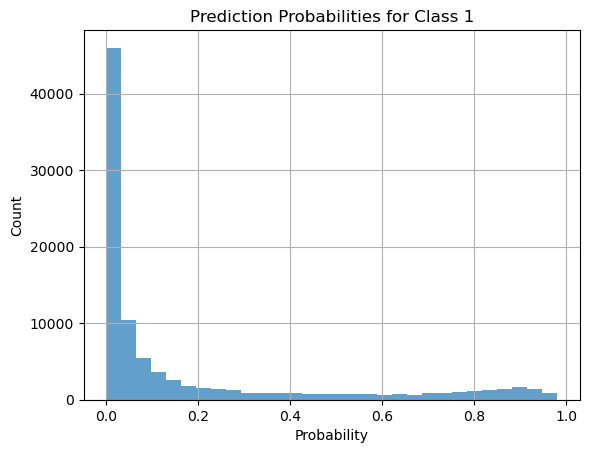

In [99]:
# Wahrscheinlichkeiten der Predictions abrufen
y_probs = best_model.predict_proba(test_final_data)

# In DataFrame speichern
df_probs = pd.DataFrame(y_probs, columns=["Prob_0", "Prob_1"])

# Histogramm der Wahrscheinlichkeiten
df_probs["Prob_1"].hist(bins=30, alpha=0.7)
plt.title("Prediction Probabilities for Class 1")
plt.xlabel("Probability")
plt.ylabel("Count")
plt.show()
